# Assignment 1 : Decision Tress using `scikit-learn`

Scikit-learn provides a range of supervised and unsupervised learning algorithms via a consistent interface in Python. In this assigment you'll explore how to train decision trees using the `scikit-learn` library. The scikit-learn documentation can be found [here](http://scikit-learn.org/stable/documentation.html).

In this assignment we'll attempt to classify patients as either having or not having diabetic retinopathy. For this task we'll be using the Diabetic Retinopathy data set, which contains 1151 instances and 20 attributes (some categorical, some continuous). You can find additional details about the dataset [here](http://archive.ics.uci.edu/ml/datasets/Diabetic+Retinopathy+Debrecen+Data+Set).

In [1]:
# You may add additional imports
import warnings
warnings.simplefilter("ignore")
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import time

%matplotlib inline

In [2]:
# Read the data from csv file
col_names = []
for i in range(20):
    if i == 0:
        col_names.append('quality')
    if i == 1:
        col_names.append('prescreen')
    if i >= 2 and i <= 7:
        col_names.append('ma' + str(i))
    if i >= 8 and i <= 15:
        col_names.append('exudate' + str(i))
    if i == 16:
        col_names.append('euDist')
    if i == 17:
        col_names.append('diameter')
    if i == 18:
        col_names.append('amfm_class')
    if i == 19:
        col_names.append('label')

data = pd.read_csv("messidor_features.txt", names = col_names)
print(data.shape)
data.head(10)

(1151, 20)


,quality,prescreen,ma2,ma3,ma4,ma5,ma6,ma7,exudate8,exudate9,exudate10,exudate11,exudate12,exudate13,exudate14,exudate15,euDist,diameter,amfm_class,label
0,1,1,22,22,22,19,18,14,49.895756,17.775994,5.270920,0.771761,0.018632,0.006864,0.003923,0.003923,0.486903,0.100025,1,0
1,1,1,24,24,22,18,16,13,57.709936,23.799994,3.325423,0.234185,0.003903,0.003903,0.003903,0.003903,0.520908,0.144414,0,0
2,1,1,62,60,59,54,47,33,55.831441,27.993933,12.687485,4.852282,1.393889,0.373252,0.041817,0.007744,0.530904,0.128548,0,1
3,1,1,55,53,53,50,43,31,40.467228,18.445954,9.118901,3.079428,0.840261,0.272434,0.007653,0.001531,0.483284,0.114790,0,0
4,1,1,44,44,44,41,39,27,18.026254,8.570709,0.410381,0.000000,0.000000,0.000000,0.000000,0.000000,0.475935,0.123572,0,1
5,1,1,44,43,41,41,37,29,28.356400,6.935636,2.305771,0.323724,0.000000,0.000000,0.000000,0.000000,0.502831,0.126741,0,1
6,1,0,29,29,29,27,25,16,15.448398,9.113819,1.633493,0.000000,0.000000,0.000000,0.000000,0.000000,0.541743,0.139575,0,1
7,1,1,6,6,6,6,2,1,20.679649,9.497786,1.223660,0.150382,0.000000,0.000000,0.000000,0.000000,0.576318,0.071071,1,0
8,1,1,22,21,18,15,13,10,66.691933,23.545543,6.151117,0.496372,0.000000,0.000000,0.000000,0.000000,0.500073,0.116793,0,1
9,1,1,79,75,73,71,64,47,22.141784,10.054384,0.874633,0.099780,0.023386,0.000000,0.000000,0.000000,0.560959,0.109134,0,1


### 1. Data preprocessing  & dimensionality reduction with PCA

Q1. Separate the feature columns from the class label column. You should end up with two separate data frames - one that contains all of the feature values and one that contains the class labels.

In [3]:
labelcol = data["label"]
print(labelcol.head(10))

features = data.drop("label", axis=1)
features.head(10)

0    0
1    0
2    1
3    0
4    1
5    1
6    1
7    0
8    1
9    1
Name: label, dtype: int64


,quality,prescreen,ma2,ma3,ma4,ma5,ma6,ma7,exudate8,exudate9,exudate10,exudate11,exudate12,exudate13,exudate14,exudate15,euDist,diameter,amfm_class
0,1,1,22,22,22,19,18,14,49.895756,17.775994,5.270920,0.771761,0.018632,0.006864,0.003923,0.003923,0.486903,0.100025,1
1,1,1,24,24,22,18,16,13,57.709936,23.799994,3.325423,0.234185,0.003903,0.003903,0.003903,0.003903,0.520908,0.144414,0
2,1,1,62,60,59,54,47,33,55.831441,27.993933,12.687485,4.852282,1.393889,0.373252,0.041817,0.007744,0.530904,0.128548,0
3,1,1,55,53,53,50,43,31,40.467228,18.445954,9.118901,3.079428,0.840261,0.272434,0.007653,0.001531,0.483284,0.114790,0
4,1,1,44,44,44,41,39,27,18.026254,8.570709,0.410381,0.000000,0.000000,0.000000,0.000000,0.000000,0.475935,0.123572,0
5,1,1,44,43,41,41,37,29,28.356400,6.935636,2.305771,0.323724,0.000000,0.000000,0.000000,0.000000,0.502831,0.126741,0
6,1,0,29,29,29,27,25,16,15.448398,9.113819,1.633493,0.000000,0.000000,0.000000,0.000000,0.000000,0.541743,0.139575,0
7,1,1,6,6,6,6,2,1,20.679649,9.497786,1.223660,0.150382,0.000000,0.000000,0.000000,0.000000,0.576318,0.071071,1
8,1,1,22,21,18,15,13,10,66.691933,23.545543,6.151117,0.496372,0.000000,0.000000,0.000000,0.000000,0.500073,0.116793,0
9,1,1,79,75,73,71,64,47,22.141784,10.054384,0.874633,0.099780,0.023386,0.000000,0.000000,0.000000,0.560959,0.109134,0


Q2. Use `sklearn.preprocessing.StandardScaler` to standardize the dataset’s features (mean = 0 and variance = 1). 

Only standardize the the features, not the class labels! This will be required for running the principal component analysis (PCA) dimensionality reduction later. Note that `StandardScaler` returns a numpy array.

In [4]:
scaler = StandardScaler()

features = scaler.fit_transform(features)
print(features)      

[[ 0.05905386  0.2982129  -0.6414863  ... -1.29476283 -0.46865568
   1.40504812]
 [ 0.05905386  0.2982129  -0.56339113 ... -0.08216786  2.00605415
  -0.7117194 ]
 [ 0.05905386  0.2982129   0.92041699 ...  0.27428264  1.1215164
  -0.7117194 ]
 ...
 [ 0.05905386 -3.35330894  0.41279842 ...  1.33436273  1.19371332
  -0.7117194 ]
 [ 0.05905386  0.2982129   0.0223226  ... -1.32796165 -0.09707846
   1.40504812]
 [ 0.05905386  0.2982129  -1.22720003 ...  1.17603538 -1.08570243
  -0.7117194 ]]


Q3 . Split your dataset into training and test sets (80% - 20% split). Use `sklearn.model_selection.train_test_split` to help you in this task. You should be working with your standardized features from here forward. Display how many records are in the training set and how many are in the test set."

In [5]:
training_feat, test_feat = train_test_split(features, train_size = 0.8, test_size = 0.2)
training_label, test_label = train_test_split(labelcol, train_size = 0.8, test_size = 0.2)
print("Records in training set:", training_feat.shape)
print("Records in test set:", test_feat.shape)

Records in training set: (920, 19)
Records in test set: (231, 19)


Q4. PCA is affected by the scale of the features that is why it is important to standardize the dataset first. The principle components generated by PCA are sensitive to the shape of the data in d-dimensional space. 
* Carry out a principal components analysis using `sklearn.decomposition.PCA` Note that you are fitting PCA on the **training set** only (NOT the test set).
* Use the `pca.explained_variance_ratio_` field to determine how many principal components are needed so that 95% variance is retained. 
* Reduce the PCA-transformed-dataset to this number of columns and you'll use the resulting dataset for subsequent tasks.

* Once the training set's dimensionality has been reduced with PCA, transform the **test set** to the principal component space that was created. (Do not fit a new PCA. Use the same one that was created with the training set.)

In [6]:
from sklearn.decomposition import PCA

pca = PCA()
pca_data = pca.fit_transform(training_feat)

var = pca.explained_variance_ratio_
print("Variance in each PC:", var)

cum_var = np.cumsum(var)
print("Cumulative variance:", cum_var)

numCol = 1 + np.argmax(cum_var > 0.95)
print("n_cols to keep:", numCol)

print(cum_var > 0.95)

training_pca = pca_data[:, :numCol]
test_scale = scaler.transform(test_feat)
test_pca = pca.transform(test_scale)[:, :numCol]
print(training_pca.shape, test_pca.shape)

Variance in each PC: [3.18907436e-01 2.80563066e-01 1.08599931e-01 5.89317109e-02
 4.91481759e-02 4.64364645e-02 4.04945005e-02 3.59499674e-02
 2.95120930e-02 1.20740110e-02 7.25283517e-03 5.98927849e-03
 2.52083801e-03 1.30417072e-03 1.12749809e-03 8.01068125e-04
 2.09165203e-04 1.13793993e-04 6.39959264e-05]
Cumulative variance: [0.31890744 0.5994705  0.70807043 0.76700214 0.81615032 0.86258678
 0.90308128 0.93903125 0.96854335 0.98061736 0.98787019 0.99385947
 0.99638031 0.99768448 0.99881198 0.99961304 0.99982221 0.999936
 1.        ]
n_cols to keep: 9
[False False False False False False False False  True  True  True  True
  True  True  True  True  True  True  True]
(920, 9) (231, 9)


### 2. Training Decision Trees in `scikit-learn`

Q5. Use `sklearn.tree.DecisionTreeClassifier` to fit a decision tree classifier on the training set. Use entropy as the split criterion. 

[Text(181.35000000000002, 190.26, 'X[8] <= 1.015\nentropy = 0.997\nsamples = 920\nvalue = [430, 490]'),
 Text(111.60000000000001, 135.9, 'X[7] <= -0.186\nentropy = 0.998\nsamples = 901\nvalue = [427, 474]'),
 Text(55.800000000000004, 81.53999999999999, 'X[1] <= -0.15\nentropy = 0.999\nsamples = 421\nvalue = [218, 203]'),
 Text(27.900000000000002, 27.180000000000007, 'entropy = 0.989\nsamples = 299\nvalue = [168, 131]'),
 Text(83.7, 27.180000000000007, 'entropy = 0.976\nsamples = 122\nvalue = [50, 72]'),
 Text(167.4, 81.53999999999999, 'X[2] <= 1.083\nentropy = 0.988\nsamples = 480\nvalue = [209, 271]'),
 Text(139.5, 27.180000000000007, 'entropy = 0.98\nsamples = 429\nvalue = [179, 250]'),
 Text(195.3, 27.180000000000007, 'entropy = 0.977\nsamples = 51\nvalue = [30, 21]'),
 Text(251.10000000000002, 135.9, 'X[5] <= 0.134\nentropy = 0.629\nsamples = 19\nvalue = [3, 16]'),
 Text(223.20000000000002, 81.53999999999999, 'entropy = 0.0\nsamples = 11\nvalue = [0, 11]'),
 Text(279.0, 81.53999999

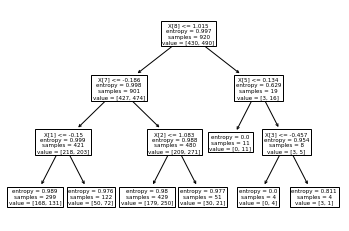

In [7]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(criterion = "entropy", max_depth=3)
clf = clf.fit(training_pca, training_label)

tree.plot_tree(clf)

Q6. Now that the tree has been learned from the training data, we can run the test data through and predict classes for our test data. Use the `predict` method of `DecisionTreeClassifier` to classify the test data. Then use `sklearn.metrics.accuracy_score` to print out the accuracy of the classifier on the test set.

In [8]:
from sklearn.metrics import accuracy_score

test_pred = clf.predict(test_pca)

accuracy_score(test_label, test_pred)

0.47619047619047616

Q7. Note that the DecisionTree classifier has many parameters that can be set. Try tweaking parameters like split criterion, max_depth, min_impurity_decrease, min_samples_leaf, min_samples_split, etc. to see how they affect accuracy.

In [9]:
new_clf = DecisionTreeClassifier(criterion="gini", max_depth=4, min_impurity_decrease=1, min_samples_leaf=2, min_samples_split=3)
new_clf = new_clf.fit(training_pca, training_label)
new_pred = new_clf.predict(test_pca)
accuracy_score(test_label, new_pred)

0.5238095238095238

### 3. Using K-fold Cross Validation

You have now built a decision tree and tested it's accuracy using the "holdout" method. But as discussed in class, this is not sufficient for estimating generalization accuracy. Instead, we should use Cross Validation to get a better estimate of accuracy. You will do that next.

Q8. Use `sklearn.model_selection.cross_val_score` to perform 10-fold cross validation on your decision tree. Report the accuracy of the model. For this step, revert back to using the original data before it got scaled and underwent PCA. So you want to use the data (features and labels) that came out of Q1. 

In [10]:
from sklearn.model_selection import cross_val_score

print(features.shape)
print(labelcol.shape)

clf = tree.DecisionTreeClassifier(criterion = "entropy")

scores = cross_val_score(clf, features, labelcol, cv=10)
scores.mean()

(1151, 19)
(1151,)


0.632518740629685

Q9. Now we want to tune our model to use the best parameters to avoid overfitting to our training data. Grid search is an approach to parameter tuning that will methodically build and evaluate a model for each combination of algorithm parameters specified in a grid. 
* Use `sklearn.model_selection.GridSearchCV` to find the best `max_depth`, `max_features`, and `min_samples_leaf` for your tree. Use 'accuracy' for the scoring criteria.
* Try the values [5,10,15,20] for `max_depth` and `min_samples_leaf`. Try [5,10,15] for `max_features`. 
* Use a 5-fold cross validation. 
* Print out the best value for each of the tested parameters.
* Print out the accuracy of the model with these best values.

In [11]:
from sklearn.model_selection import GridSearchCV

params = {"max_depth": [5,10,15,20], "max_features": [5,10,15], "min_samples_leaf": [5,10,15,20]}

grid_search = GridSearchCV(clf, params, cv=5, scoring="accuracy")

grid_search.fit(features, labelcol)

print(grid_search.best_params_)

print("Accuracy:", grid_search.best_score_*100)

{'max_depth': 20, 'max_features': 15, 'min_samples_leaf': 20}
Accuracy: 66.20330147697653


Q10. To perform the nested cross-validation that we discussed in class, you'll now need to pass the `GridSearchCV` into a `cross_val_score`. 

What this does is: the `cross_val_score` splits the data in to train and test sets for the first fold, and it passes the train set into `GridSearchCV`. `GridSearchCV` then splits that set into train and validation sets for k number of folds (the inner CV loop). The hyper-parameters for which the average score over all inner iterations is best, is reported as the `best_params_`, `best_score_`, and `best_estimator_`(best decision tree). This best decision tree is then evaluated with the test set from the `cross_val_score` (the outer CV loop). And this whole thing is repeated for the remaining k folds of the `cross_val_score` (the outer CV loop). 

That is a lot of explanation for a very complex (but IMPORTANT) process, which can all be performed with a single line of code!

Be patient for this one to run. The nested cross-validation loop can take some time. An asterisk [\*] next to the cell indicates that it is still running.

Print the accuracy of your tuned, cross-validated model. This is the official accuracy that you would report for your model.

In [12]:
cross_val_score(grid_search, features, labelcol, cv=10).mean()

0.6255247376311843

Q11. Our accuracy rate isn't very good. We wouldn't want to use this model in the real world to actually diagnose patients because it is wrong about 40% of the time! What could you do to improve the accuracy of the model? Answer as a comment:

In [13]:
'''
More dimensionality reduction would improve accuracy. If two or more features are close/related too much, eliminate one
of the features. Possibly collect more data on the matter so that the train percentage can be more meaningful. Have a set
max depth for our trees so that errors are reduced.
'''

'\nMore dimensionality reduction would improve accuracy. If two or more features are close/related too much, eliminate one\nof the features. Possibly collect more data on the matter so that the train percentage can be more meaningful. Have a set\nmax depth for our trees so that errors are reduced.\n'